Comparision of axonGCaMP7b with cytocolic GCaMP7b in neuronal culture. Images were taken by Heike. 
The data her is coming from: `data\gergely\invivo_DATA\axonGCaMP7b\190208_Gergo_axon-gcamp`
updated: 5/23/19 -- GT

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pandas.stats.moments import \
    rolling_window, rolling_apply, rolling_quantile

In [2]:
%matplotlib inline

### axon-GCaMPp7b

In [73]:
os.chdir('/data/gergely/invivo_DATA/axonGCaMP7b/190208_Gergo_axon-gcamp/suite_axGcAMP/suite2p/plane0/')

In [74]:
ls

data.bin*  Fneu.npy*  F.npy*  iscell.npy*  ops.npy*  spks.npy*  stat.npy*


`F.npy`: array of fluorescence traces (ROIs by timepoints)  
`Fneu.npy`: array of neuropil fluorescence traces (ROIs by timepoints)  
`spks.npy`: array of deconvolved traces (ROIs by timepoints)  
`stat.npy`: array of statistics computed for each cell (ROIs by 1)  
`ops.npy`: options and intermediate outputs
`iscell.npy`: specifies whether an ROI is a cell, first column is 0/1, and second column is probability that the ROI is a cell based on the default classifier

#### Memo
`dfof = (rawF  - baseline)/baseline`

In [76]:
traces = np.load('F.npy')
neuropil = np.load('Fneu.npy')
iscell = np.load('iscell.npy')
print(len(traces),len(neuropil), len(iscell))

(92, 92, 92)


In [123]:
iscell.shape

(92, 2)

In [137]:
def calc_baseline(data):
    baseline = np.empty(data.shape)
    (nCells, nFrames) = data.shape
    
    frame = pd.DataFrame(data[:,:])
    frame = rolling_window(frame.T, window=30, win_type='boxcar',
                           min_periods=30 / 3, center=True, axis=0).T
    frame = rolling_apply(frame.T, 100, np.nanmin, min_periods=100 / 2,
                         center=True).T
    baseline[:,:] = frame.values  
    return baseline

In [139]:
baseline = calc_baseline(traces)

/home/gergely/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(win_type=boxcar,center=True,min_periods=10,window=30,axis=0).mean()
  import sys
/home/gergely/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=True,min_periods=50,window=100).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  if __name__ == '__main__':


In [140]:
baseline.shape

(92, 1198)

In [149]:
baseline2 = baseline.reshape((1198,92))

In [120]:
traces2 = traces.reshape((1198,92))

(1198, 92)

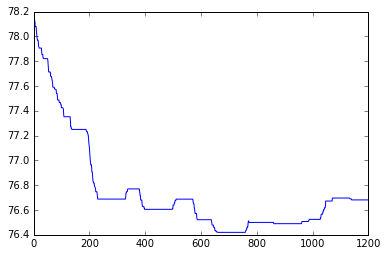

In [148]:
plt.plot(baseline[80])

In [154]:
axonG = pd.DataFrame(baseline2)

In [155]:
axonG

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,94.933581,94.933581,94.933581,94.933581,94.933581,94.933581,94.933581,94.933581,94.933581,94.933581,...,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643
1,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643,93.973643,...,94.025361,94.031390,94.061219,94.061219,94.061219,94.061219,94.061219,94.061219,94.061219,94.061219
2,94.061219,94.061219,94.061219,94.061219,94.061219,94.061219,94.061219,94.061219,94.061219,94.061219,...,92.634149,92.411326,92.392802,92.384228,92.369123,92.364443,92.171558,92.109717,92.099782,92.099782
3,92.099782,92.099782,92.099782,91.922672,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,...,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621
4,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,91.910621,...,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249
5,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249,91.994249,...,92.186143,91.747750,91.747750,91.747750,91.747750,91.747750,91.353089,91.221209,91.058832,90.965652
6,90.878111,90.681502,90.476517,90.476517,90.406393,90.366053,90.366053,90.366053,90.366053,90.153954,...,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697
7,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697,88.952697,...,89.067352,89.094503,89.094503,89.094503,89.094503,89.094503,89.094503,89.094503,89.094503,89.094503
8,89.094503,89.094503,89.094503,89.094503,89.094503,89.094503,89.094503,89.094503,89.094503,89.094503,...,90.578256,90.578256,90.578256,90.578256,90.578256,90.578256,90.578256,90.578256,90.578256,90.578256
9,90.578256,90.578256,90.578256,90.578256,90.578256,90.578256,90.403583,90.403583,90.377603,90.220984,...,88.096847,88.096847,88.096847,88.096847,88.096847,88.096847,88.096847,88.096847,88.096847,88.096847


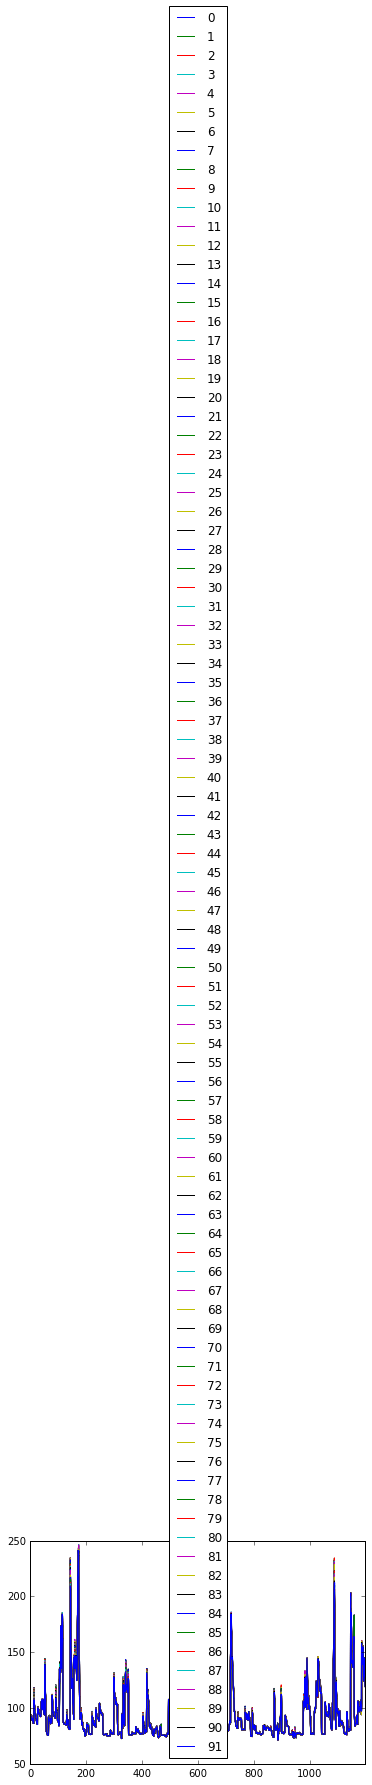

In [156]:
axonG.plot()

TypeError: float() argument must be a string or a number

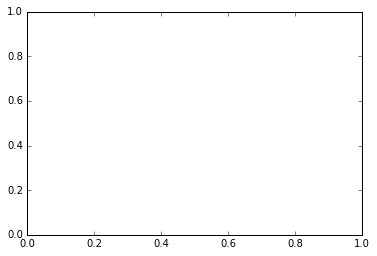

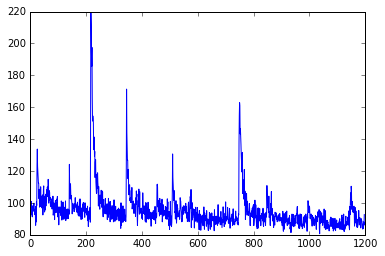

In [78]:
plt.plot(traces[0])

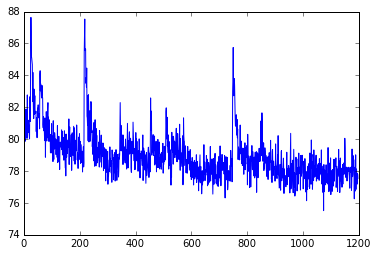

In [79]:
plt.plot(neuropil[0])

In [77]:
iscell[:10]

array([[  1.00000000e+00,   2.09161106e-03],
       [  0.00000000e+00,   1.96703259e-02],
       [  1.00000000e+00,   3.13053755e-04],
       [  1.00000000e+00,   2.06425845e-04],
       [  0.00000000e+00,   3.17708595e-03],
       [  0.00000000e+00,   6.23583766e-04],
       [  0.00000000e+00,   1.03058257e-02],
       [  0.00000000e+00,   1.10822046e-05],
       [  0.00000000e+00,   3.50437923e-05],
       [  0.00000000e+00,   8.51936188e-05]])

### cytosolic GCaMP7b

In [80]:
os.chdir('/data/gergely/invivo_DATA/axonGCaMP7b/190208_Gergo_axon-gcamp/suite_cytoGCaMP/suite2p/plane0/')

In [81]:
ls

data.bin*  Fneu.npy*  F.npy*  iscell.npy*  ops.npy*  spks.npy*  stat.npy*


In [82]:
cytotraces = np.load('F.npy')
cytoneuropil = np.load('Fneu.npy')
cytoiscell = np.load('iscell.npy')
print(len(traces),len(neuropil), len(iscell))

(92, 92, 92)


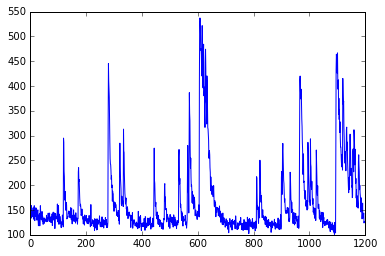

In [84]:
plt.plot(cytotraces[0])

In [54]:
np.load("stat.npy")

array([ {u'compact': 1.0942688603522635, u'lam': array([ 0.06816478,  0.07507873,  0.07529109,  0.11666773,  0.07917368,
        0.08378652,  0.10203759,  0.06048028,  0.06542427,  0.1589635 ,
        0.20987786,  0.21972086,  0.21917227,  0.1293519 ,  0.07224112,
        0.16158055,  0.20049329,  0.17779574,  0.09262508,  0.10246617,
        0.17415839,  0.19333985,  0.12323686,  0.06401027,  0.11880388,
        0.14375582,  0.12169707,  0.09279002,  0.07875729,  0.06654038,
        0.0779406 ,  0.11006515,  0.14225258,  0.18652189,  0.20351543,
        0.16078101,  0.06884095,  0.11926568,  0.16711926,  0.20963494,
        0.29870978,  0.29862845,  0.15104078,  0.077006  ,  0.07692526,
        0.08875514,  0.11847378,  0.10994934]), u'med': [160.5, 78.0], u'npix': 48, u'skew': 2.4831724, u'npix_norm': 0.35591742, u'overlap': array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, 